# GIS-Based Traffic Simulation with Mesa-Geo

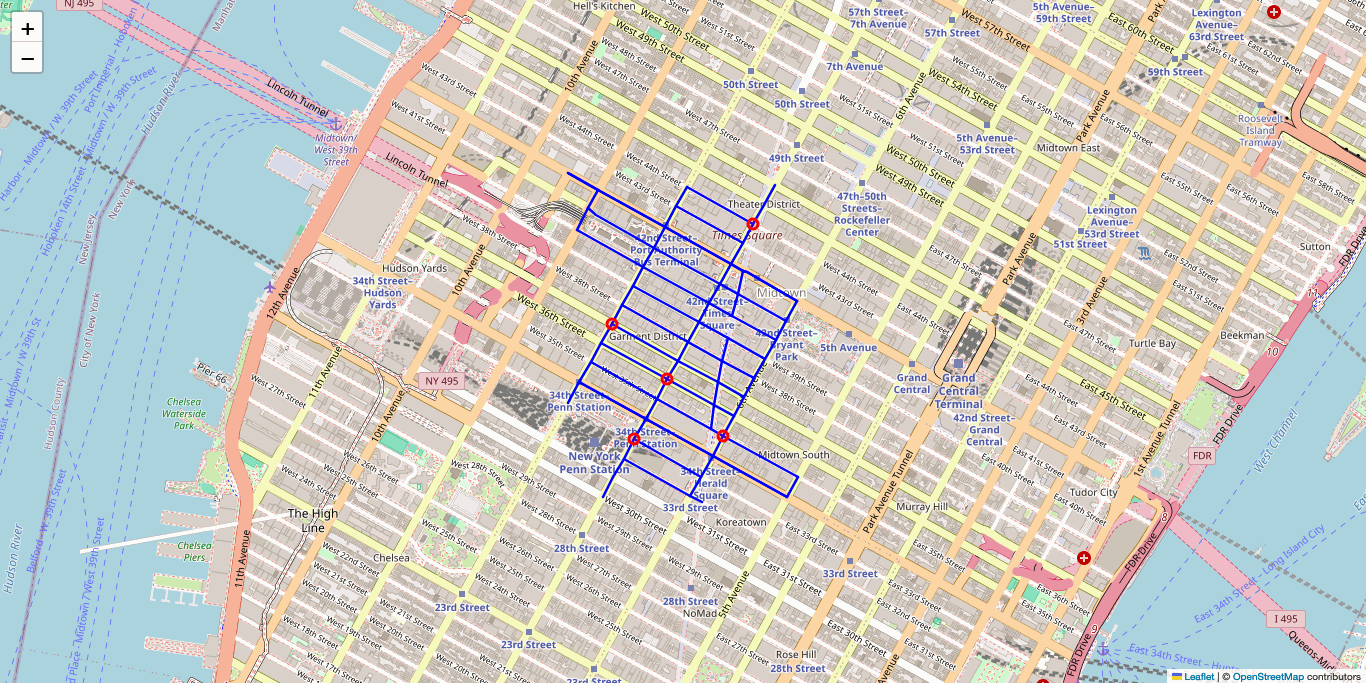

## Overview

This project is a GIS-based traffic simulation platform developed using the Mesa-Geo extension for Mesa. The application models and visualizes vehicle movements on a road network, providing insights into traffic patterns and enabling the analysis of traffic management strategies. This simulation tool is valuable for urban planners, researchers, and policymakers in understanding and optimizing traffic flow in cities.

## Why GIS-Based Traffic Simulation?

Traffic congestion is a significant issue in urban areas, leading to increased travel times, higher fuel consumption, and elevated pollution levels. By simulating traffic congestion, urban planners, researchers, and policymakers can:

- **Identify Congestion Points:** Pinpoint critical areas prone to traffic jams.
- **Analyze Traffic Patterns:** Understand how vehicles move through the city.
- **Evaluate Traffic Management Strategies:** Test the effectiveness of different traffic management strategies.
- **Optimize Traffic Flow:** Improve the overall efficiency of the road network.

## Features

- **Realistic Road Networks:** Uses OSMnx to import real road networks.
- **Dynamic Traffic Simulation:** Simulates vehicle movements and congestion points dynamically.
- **Interactive Visualization:** Provides an interactive map for visualizing the simulation in real-time.
- **Customizable Parameters:** Allows users to input specific parameters, such as the number of vehicles and their routes.

## Installation

### Prerequisites

- Python 3.x
- Mesa
- Mesa-Geo
- OSMnx
- NetworkX
- Folium



## Usage

1. **Enter Simulation Parameters:** Specify the number of vehicles, start coordinates, and end coordinates.
2. **Run Simulation:** Start the simulation to see how traffic flows and where congestion occurs.
3. **View Results:** Analyze the simulation results using the interactive map and graphical outputs.

## How It Works

1. **Import Road Network:** Uses OSMnx to import a road network from OpenStreetMap based on bounding box coordinates.
2. **Initialize Simulation:** Sets up the simulation environment using Mesa and Mesa-Geo.
3. **Simulate Traffic Flow:** Vehicles move through the network following the shortest paths calculated by NetworkX.
4. **Visualize Results:** Uses Folium to visualize the road network and vehicle movements on an interactive map.


## Future Enhancements

- **Dynamic Traffic Data:** Incorporate real-time traffic data for more accurate simulations.
- **Advanced Visualization:** Enhance the visualization with heatmaps and traffic density graphs.
- **Interactive Controls:** Add more interactive controls for users to adjust simulation parameters on the fly.
- **Extended Simulation Scenarios:** Support more complex scenarios like traffic incidents, road closures, and traffic light effects.


# Importing  libraries 

- **Mesa** and **Mesa-Geo** provide the foundation for building the agent-based model with geographic context.
- **GeoPandas** enables us to handle and manipulate geographic data easily, making it possible to integrate real-       world maps and spatial data into our simulation.
- **Shapely** allows us to define and work with geometric shapes, which is crucial for positioning agents and           defining their movement paths.
- **Random** helps in adding variability and realism to the simulation by introducing random elements, such as     varying agent behaviors and routes.

By importing these libraries, we ensure that we have the necessary tools to build a robust and realistic GIS-based traffic simulation. Each library plays a vital role in different aspects of the project, from data handling to agent behavior and geographic visualization.

In [1]:
import mesa
import mesa_geo as mg
import geopandas as gpd
from shapely.geometry import Point
import random

# Class Definitions - Brief Explanation with Comments

In this step, we define the core classes for our GIS-based traffic simulation. Here's a brief explanation of each class, with comments to explain the reasoning behind each part of the code.

#### Classes

1. **TrafficGeoSpace**:
   - **Purpose**: Create a geographic space for the simulation.
   - **Why**: Extends `GeoSpace` from Mesa-Geo to utilize built-in geographic functionalities.
   - **Details**: Uses CRS "EPSG:3857" for accurate spatial representation.

2. **VehicleAgent**:
   - **Purpose**: Represent a vehicle that can move within the geographic space.
   - **Why**: Extends `GeoAgent` to manage geographic positions and behaviors.
   - **Initialization**: Assigns a random speed to each vehicle, introducing variability.
   - **Behavior (`step` method)**: Updates the vehicle's position to simulate movement.
   - **Movement (`random_move` method)**: Generates a new random position to mimic natural vehicle movement.


This brief explanation with comments clarifies the purpose and reasoning behind each class and method, providing clarity on their roles in the traffic simulation.

In [2]:
# GeoSpace to hold GIS-based agents
class TrafficGeoSpace(mg.GeoSpace):
    def __init__(self):
        super().__init__(
            crs="EPSG:3857"
        )  # Set CRS explicitly for accurate geographic data representation


# Vehicle Agent
class VehicleAgent(mg.GeoAgent):
    def __init__(self, unique_id, model, geometry, crs="EPSG:3857"):
        super().__init__(unique_id, model, geometry, crs)
        self.speed = random.uniform(
            10, 20
        )  # Speed in arbitrary units to introduce variability among vehicles

    def step(self):
        # Example behavior: move randomly
        new_position = self.random_move()
        self.geometry = (
            new_position  # Update the agent's position to the new random position
        )

    def random_move(self):
        x, y = self.geometry.xy  # Extract current x and y coordinates
        x_new = x[0] + random.uniform(
            -0.001, 0.001
        )  # Generate a new x-coordinate by adding a small random value
        y_new = y[0] + random.uniform(
            -0.001, 0.001
        )  # Generate a new y-coordinate by adding a small random value
        return Point(x_new, y_new)  # Return the new position as a Point object

# Defining a Traffic Model


- **TrafficModel**: A simulation model for vehicle movement on a road network.
  - **Initialization**: Sets up the model, scheduler, geographic space, loads the road network, and creates vehicle agents.
  - **Loading Roads**: Reads the road network from a shapefile and adds road agents to the geographic space.
  - **Creating Vehicles**: Generates and adds vehicle agents to the geographic space and scheduler.
  - **Model Step**: Advances the model by one step and collects vehicle position data.
  - **Collecting Data**: Gathers positions of vehicle agents after each step for analysis or visualization.




In [3]:
# Define the TrafficModel class
class TrafficModel(mesa.Model):
    def __init__(self, road_network_file):
        super().__init__()  # Explicitly initialize the Model
        self.schedule = mesa.time.RandomActivation(
            self
        )  # Scheduler to manage agent actions
        self.space = TrafficGeoSpace()  # Create a geographic space for agents
        self.load_roads(road_network_file)  # Load road network data
        self.create_vehicles(50)  # Create 50 vehicle agents
        self.vehicle_positions = []  # Initialize list to store vehicle positions

    def load_roads(self, road_network_file):
        roads = gpd.read_file(road_network_file)  # Read road network from shapefile
        for idx, road in roads.iterrows():
            road_agent = mg.GeoAgent(
                idx, self, road.geometry, roads.crs
            )  # Create road agent
            self.space.add_agents(road_agent)  # Add road agent to geographic space

    def create_vehicles(self, num_vehicles):
        for i in range(num_vehicles):
            x, y = (
                random.uniform(-10, 10),
                random.uniform(-10, 10),
            )  # Generate random start positions
            vehicle = VehicleAgent(i, self, Point(x, y))  # Create vehicle agent
            self.space.add_agents(vehicle)  # Add vehicle agent to geographic space
            self.schedule.add(vehicle)  # Add vehicle agent to scheduler

    def step(self):
        self.schedule.step()  # Advance the simulation by one step
        self.collect_data()  # Collect data after each step

    def collect_data(self):
        positions = [
            (agent.unique_id, agent.geometry.x, agent.geometry.y)
            for agent in self.schedule.agents
            if isinstance(agent, VehicleAgent)
        ]
        self.vehicle_positions.append(
            positions
        )  # Store current positions of vehicle agents


# Running the Model
road_network_file = "roads.shp"  # Update this path to your road network file
model = TrafficModel(road_network_file)  # Create an instance of TrafficModel

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/mesa_geo/geospace.py:169: UserWarning: Converting GeoAgent from crs EPSG:4326 to the crs of TrafficGeoSpace - EPSG:3857. Please check your crs settings if this is unintended, or set `GeoSpace.warn_crs_conversion` to `False` to suppress this warning message.
  self._check_agent(agent)


In [4]:
for i in range(100):  # Run for 100 steps
    model.step()

In [5]:
import folium

# Create a map centered around the initial positions of the vehicles
map_center = [0, 0]  # Change this to your actual center coordinates if needed
mymap = folium.Map(location=map_center, zoom_start=12)

# Add vehicle positions to the map
for step in model.vehicle_positions:
    for unique_id, x, y in step:
        folium.Marker(location=[y, x], popup=f"Vehicle {unique_id}").add_to(mymap)

# Vehicle Positions 
The scatter plot shows the geographic positions of all vehicle agents in the simulation. Each point represents a vehicle's current location, with the x-axis representing longitude and the y-axis representing latitude. This visualization helps in understanding the spatial distribution and movement patterns of the vehicles over time.

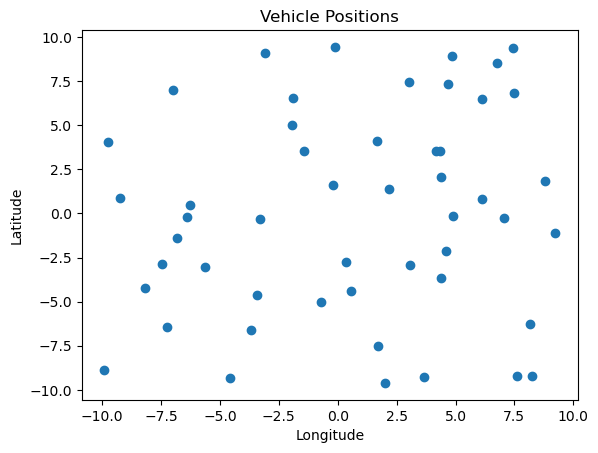

In [6]:
import matplotlib.pyplot as plt


def plot_vehicles(model):
    x = [
        agent.geometry.x
        for agent in model.space.agents
        if isinstance(agent, VehicleAgent)
    ]
    y = [
        agent.geometry.y
        for agent in model.space.agents
        if isinstance(agent, VehicleAgent)
    ]
    plt.scatter(x, y)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Vehicle Positions")
    plt.show()


plot_vehicles(model)

# Line Represntaion of Realistic Road

The plot shows the road network around Times Square, NYC. It includes streets, intersections, and other road features. The graph visualization helps in understanding the road layout and connectivity in the area.

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_24801/566345046.py:10: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type='drive')


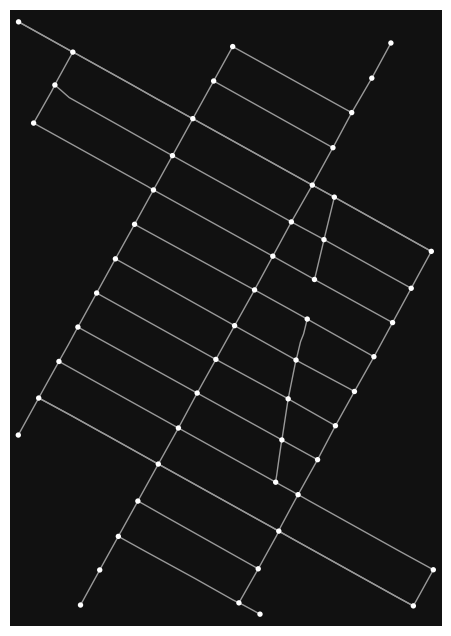

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:
import osmnx as ox

# Bounding box coordinates for Times Square, NYC
north = 40.759
south = 40.748
east = -73.984
west = -73.994

# Use the bbox parameter
G = ox.graph_from_bbox(north, south, east, west, network_type="drive")

# Check if the graph is already simplified before simplifying
if not G.graph.get("simplified", False):
    G = ox.simplify_graph(G)

# Plot the graph
ox.plot_graph(G)

# Scatter presentation of Road Networks 
The plot shows the simplified road network around Times Square, NYC. Red nodes represent intersections, and black lines represent road segments. This visualization helps in understanding the road layout and connectivity in the area.

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_24801/2754317047.py:12: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type='drive')


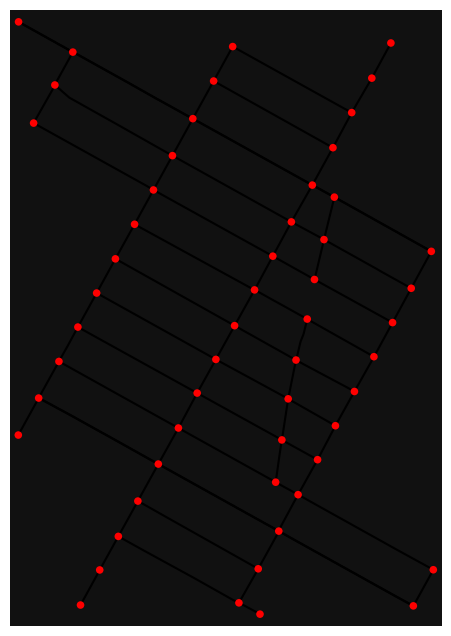

In [8]:
import osmnx as ox
import matplotlib.pyplot as plt

# Bounding box coordinates for Times Square, NYC
north = 40.759
south = 40.748
east = -73.984
west = -73.994

# Create a graph from the bounding box
bbox = (north, south, east, west)
G = ox.graph_from_bbox(north, south, east, west, network_type="drive")

# Check if the graph is already simplified before simplifying
if not G.graph.get("simplified", False):
    G = ox.simplify_graph(G)

# Plot the graph
fig, ax = ox.plot_graph(
    G, node_size=30, node_color="r", edge_linewidth=1.5, edge_color="black"
)
plt.show()

# Result 1 
This code simulates and visualizes the movement of a vehicle along the shortest path between two points in Times Square, NYC. It defines the bounding box coordinates, start and end points for the vehicle, and uses OSMnx to create a road network graph. The plot_vehicle function plots the graph and the vehicle's current position, while a loop iterates through each node in the route to simulate movement. A delay of 1 second is added between each step, and a message is displayed when the vehicle reaches its destination.

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_24801/4076012628.py:13: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type='drive')


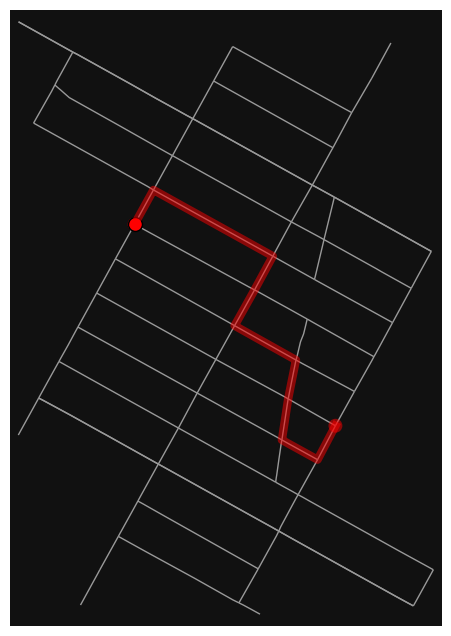

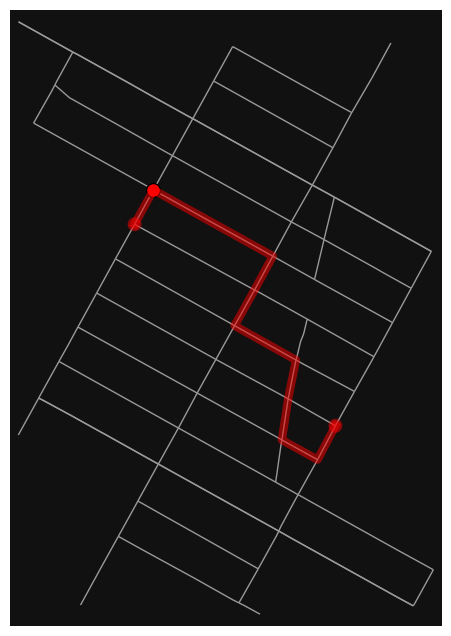

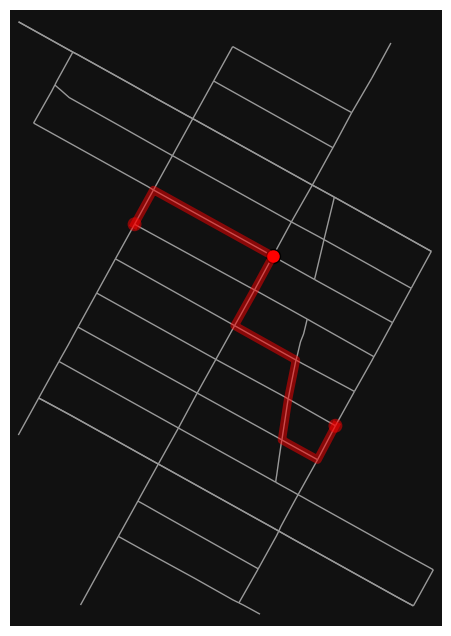

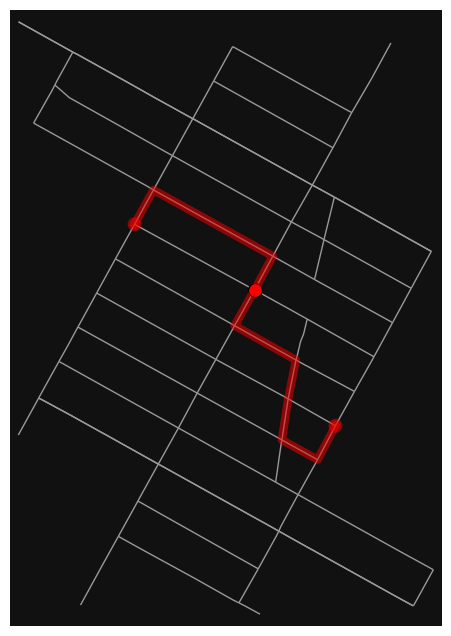

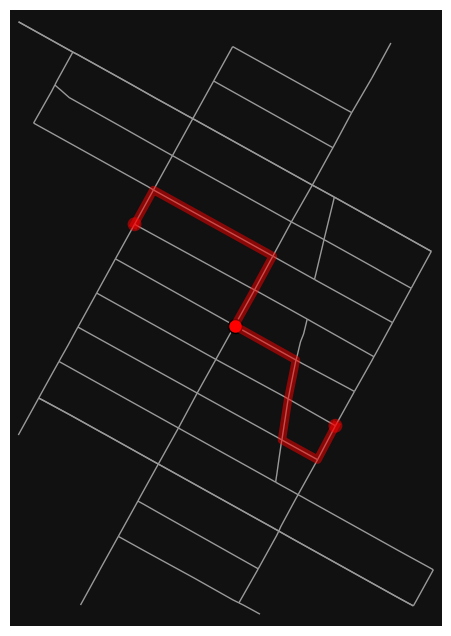

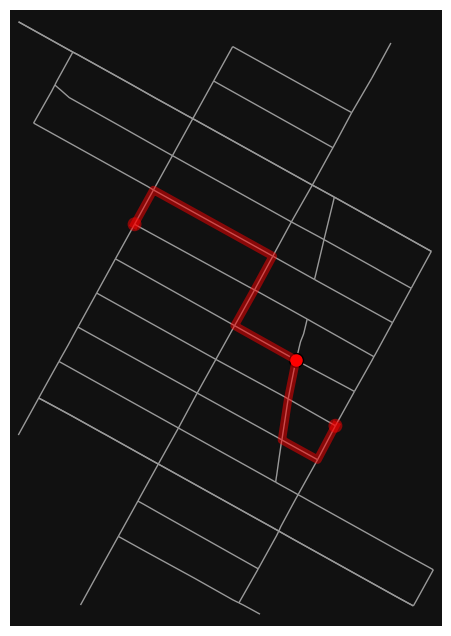

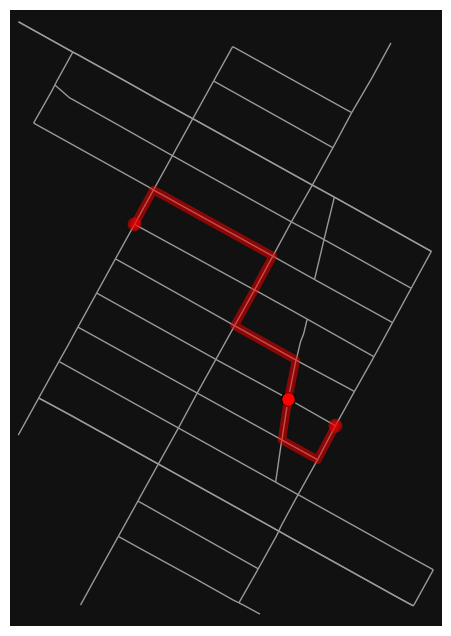

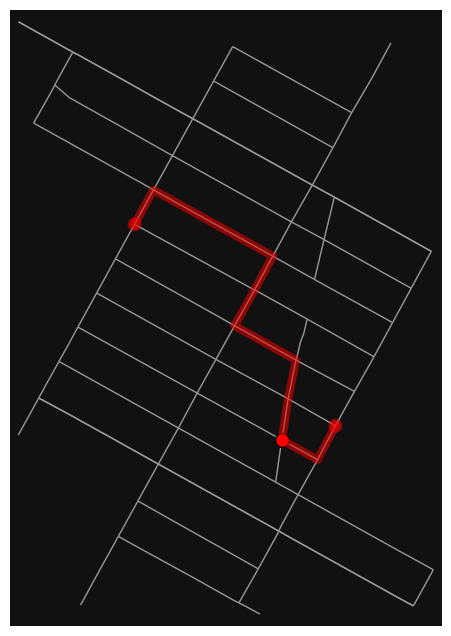

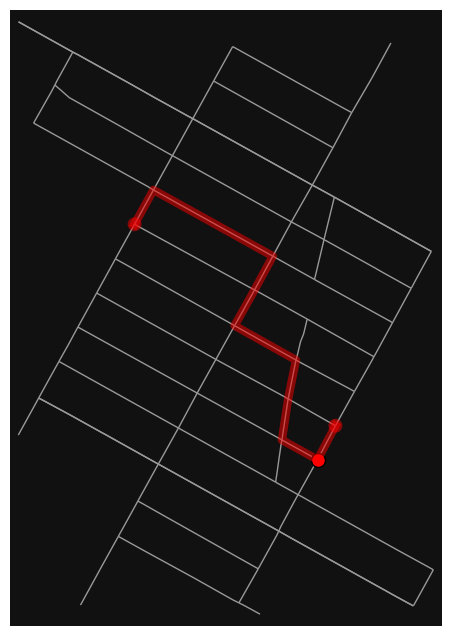

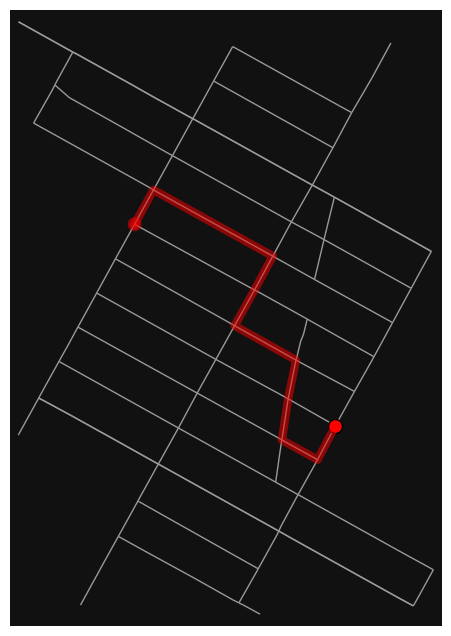

Vehicle has reached the destination.


In [9]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import time

# Bounding box coordinates for Times Square, NYC
north = 40.759
south = 40.748
east = -73.984
west = -73.994

# Create a graph from the bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive")

# Get the nodes closest to the start and end points
start_point = (40.755, -73.990)  # Example start point
end_point = (40.751, -73.985)  # Example end point
start_node = ox.distance.nearest_nodes(G, X=start_point[1], Y=start_point[0])
end_node = ox.distance.nearest_nodes(G, X=end_point[1], Y=end_point[0])

# Calculate the shortest path
route = nx.shortest_path(G, source=start_node, target=end_node, weight="length")


# Function to plot the graph and the vehicle's position
def plot_vehicle(G, route, vehicle_position):
    fig, ax = ox.plot_graph_route(
        G, route, route_linewidth=6, node_size=0, show=False, close=False
    )
    ax.scatter(
        vehicle_position[1], vehicle_position[0], c="red", s=100, edgecolors="black"
    )
    plt.show()


# Simulate the vehicle's movement along the route
for node in route:
    vehicle_position = (G.nodes[node]["y"], G.nodes[node]["x"])
    plot_vehicle(G, route, vehicle_position)
    time.sleep(1)  # Delay to simulate movement

print("Vehicle has reached the destination.")

# Result 2 
This code simulates and visualizes the movement of two vehicles along their respective shortest paths in Times Square, NYC. It creates a road network graph, defines start and end points for the vehicles, calculates the shortest path for each vehicle, and plots the graph with the vehicles' positions at each step. The simulation includes a 1-second delay between each step, and a message is displayed once both vehicles reach their destinations.


/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_24801/3940071347.py:13: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type='drive')


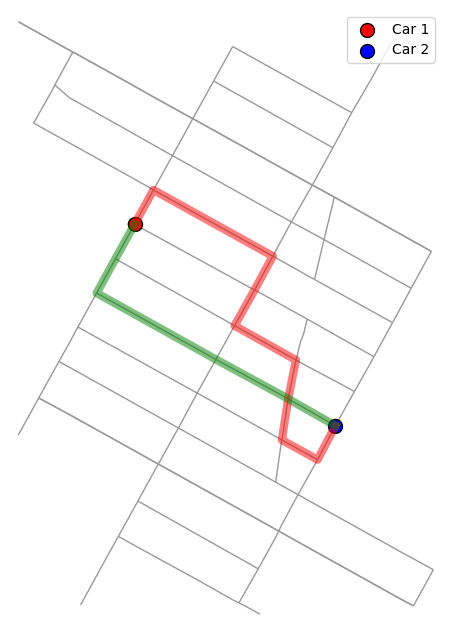

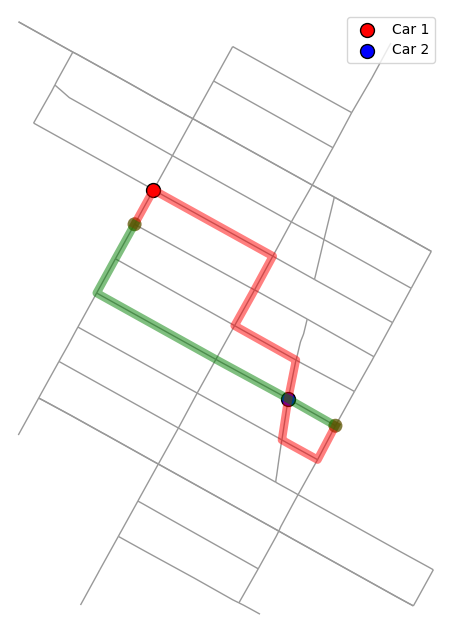

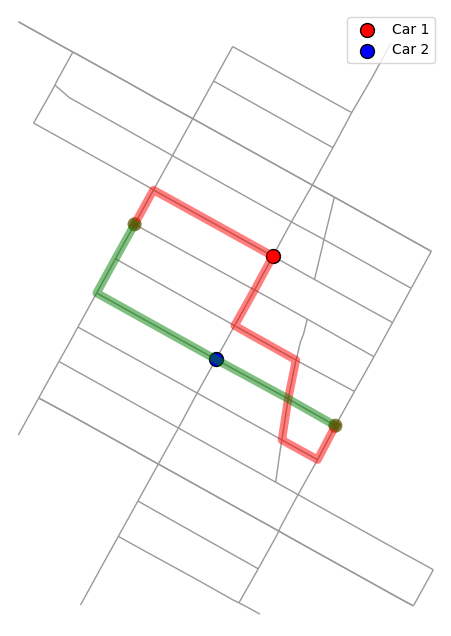

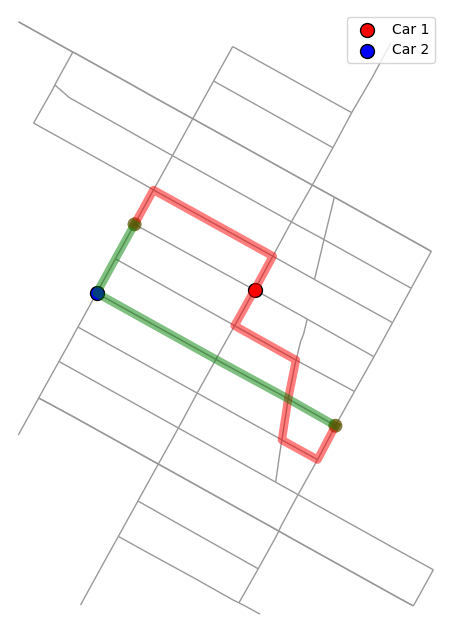

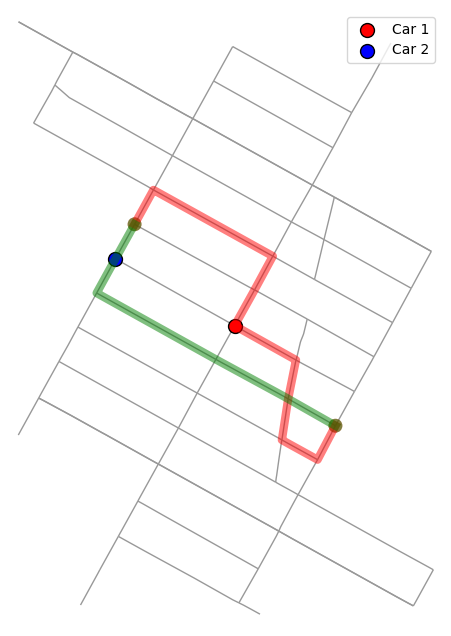

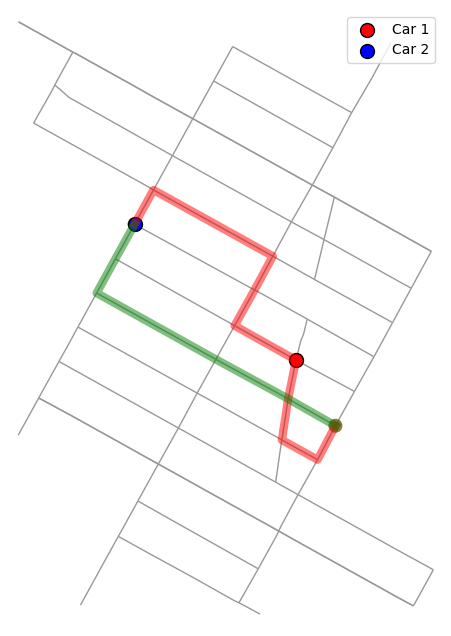

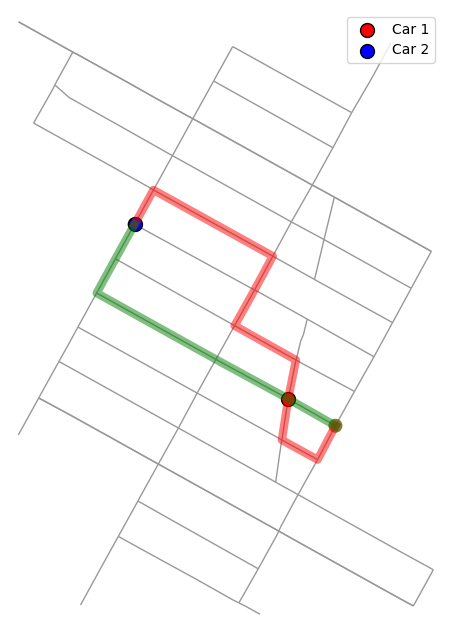

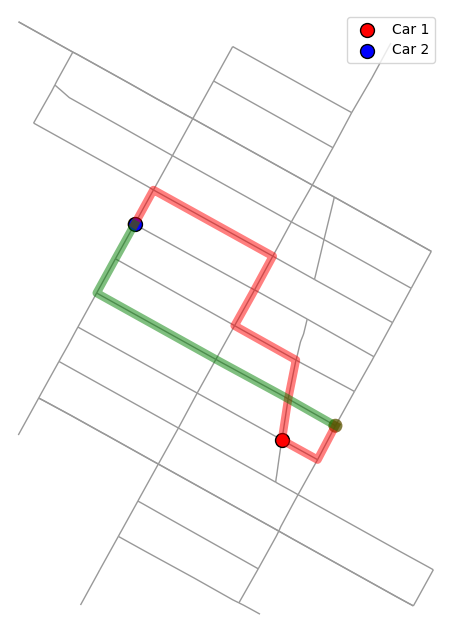

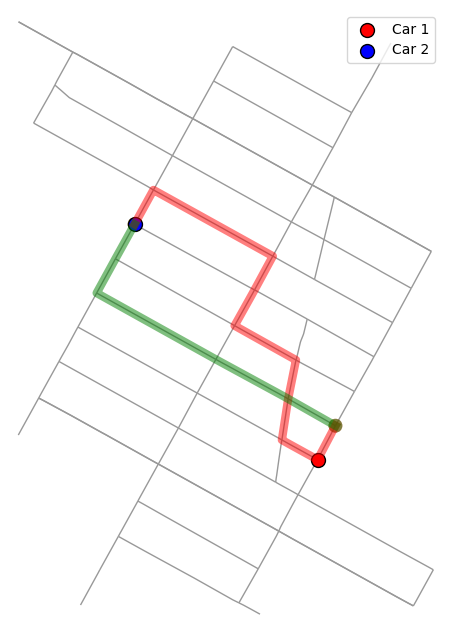

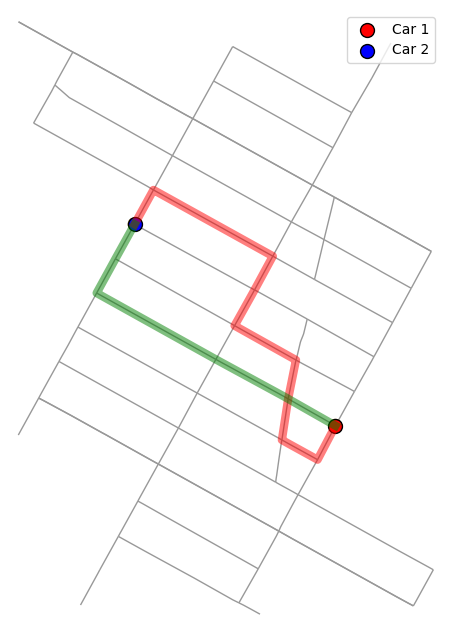

Both vehicles have reached their destinations.


In [10]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import time

# Bounding box coordinates for Times Square, NYC
north = 40.759
south = 40.748
east = -73.984
west = -73.994

# Create a graph from the bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive")

# Get the nodes closest to the start and end points for both cars
start_point_1 = (40.755, -73.990)  # Car 1 start point
end_point_1 = (40.751, -73.985)  # Car 1 end point

start_point_2 = (40.751, -73.985)  # Car 2 start point
end_point_2 = (40.755, -73.990)  # Car 2 end point

start_node_1 = ox.distance.nearest_nodes(G, X=start_point_1[1], Y=start_point_1[0])
end_node_1 = ox.distance.nearest_nodes(G, X=end_point_1[1], Y=end_point_1[0])

start_node_2 = ox.distance.nearest_nodes(G, X=start_point_2[1], Y=start_point_2[0])
end_node_2 = ox.distance.nearest_nodes(G, X=end_point_2[1], Y=end_point_2[0])

# Calculate the shortest path for both cars
route_1 = nx.shortest_path(G, source=start_node_1, target=end_node_1, weight="length")
route_2 = nx.shortest_path(G, source=start_node_2, target=end_node_2, weight="length")


# Function to plot the graph and the vehicles' positions
def plot_vehicles(G, route_1, route_2, position_1, position_2):
    fig, ax = ox.plot_graph_route(
        G,
        route_1,
        route_linewidth=6,
        node_size=0,
        show=False,
        close=False,
        bgcolor="white",
    )
    ox.plot_graph_route(
        G,
        route_2,
        route_linewidth=6,
        node_size=0,
        show=False,
        close=False,
        ax=ax,
        route_color="green",
    )
    ax.scatter(
        position_1[1], position_1[0], c="red", s=100, edgecolors="black", label="Car 1"
    )
    ax.scatter(
        position_2[1], position_2[0], c="blue", s=100, edgecolors="black", label="Car 2"
    )
    plt.legend()
    plt.show()


# Get the maximum length of the routes
max_len = max(len(route_1), len(route_2))

# Simulate the vehicles' movement along their routes
for i in range(max_len):
    # Get the current positions of both cars
    if i < len(route_1):
        position_1 = (G.nodes[route_1[i]]["y"], G.nodes[route_1[i]]["x"])
    else:
        position_1 = (G.nodes[route_1[-1]]["y"], G.nodes[route_1[-1]]["x"])

    if i < len(route_2):
        position_2 = (G.nodes[route_2[i]]["y"], G.nodes[route_2[i]]["x"])
    else:
        position_2 = (G.nodes[route_2[-1]]["y"], G.nodes[route_2[-1]]["x"])

    # Plot the vehicles on the graph
    plot_vehicles(G, route_1, route_2, position_1, position_2)
    time.sleep(1)  # Delay to simulate movement

print("Both vehicles have reached their destinations.")

# Urban Traffic Simulation with Congestion

This code simulates traffic flow in a critical urban area (e.g., Times Square, NYC) by creating a road network graph and introducing congestion at critical points. It then generates random routes for a specified number of vehicles, considering the congestion, and animates the vehicles' movement along their routes on the road network graph. The animation shows the progression of the vehicles from their starting points to their destinations, highlighting the impact of congestion on traffic flow.

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_24801/1942483411.py:12: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(*bbox, network_type='drive')


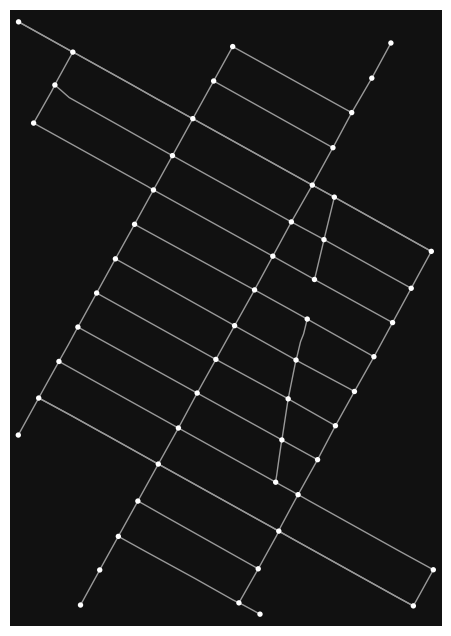

Simulation complete.


In [11]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

# Bounding box coordinates for a critical urban area (e.g., Times Square, NYC)
north, south, east, west = 40.759, 40.748, -73.984, -73.994

# Create a graph from the bounding box using the bbox parameter
bbox = (north, south, east, west)
G = ox.graph_from_bbox(*bbox, network_type="drive")

# Define critical points (e.g., intersections) prone to congestion
critical_points = [
    (40.755, -73.990),  # Example critical point 1
    (40.752, -73.987),  # Example critical point 2
]


# Function to simulate congestion at critical points
def simulate_congestion(G, critical_points):
    for point in critical_points:
        node = ox.distance.nearest_nodes(G, X=point[1], Y=point[0])
        if node in G.nodes:
            # Increase the weight (travel time) of edges connected to the critical node
            for u, v, key, data in G.edges(node, keys=True, data=True):
                data["length"] *= 5  # Simulating congestion by increasing travel time


simulate_congestion(G, critical_points)

# Define number of vehicles
num_vehicles = 5

# Generate random start and end points for each vehicle
vehicles = []
for _ in range(num_vehicles):
    start_point = (random.uniform(south, north), random.uniform(west, east))
    end_point = (random.uniform(south, north), random.uniform(west, east))
    start_node = ox.distance.nearest_nodes(G, X=start_point[1], Y=start_point[0])
    end_node = ox.distance.nearest_nodes(G, X=end_point[1], Y=end_point[0])
    try:
        route = nx.shortest_path(G, source=start_node, target=end_node, weight="length")
        vehicles.append(route)
    except nx.NetworkXNoPath:
        pass  # If no path is found, skip this pair

# Plot the initial graph and route
fig, ax = ox.plot_graph(G, show=False, close=False)


# Function to update the plot for the animation
def update(num, vehicles, G, ax):
    ax.clear()
    ox.plot_graph(G, ax=ax, show=False, close=False)
    for route in vehicles:
        if num < len(route):
            node = route[num]
            vehicle_position = (G.nodes[node]["y"], G.nodes[node]["x"])
            ax.scatter(
                vehicle_position[1],
                vehicle_position[0],
                c="red",
                s=100,
                edgecolors="black",
            )
    return ax


# Create animation to show traffic flow
max_route_length = max(len(route) for route in vehicles)
ani = FuncAnimation(
    fig, update, frames=max_route_length, fargs=(vehicles, G, ax), repeat=False
)


plt.show()

print("Simulation complete.")

# Interactive Map of Urban Traffic Congestion

This code creates an interactive map using Folium to visualize urban traffic congestion in a critical area, such as Times Square, NYC. It simulates congestion at critical points and displays the movement of vehicles along their routes, highlighting the impact of congestion on traffic flow. The map provides a dynamic representation of traffic conditions, aiding in understanding and analyzing urban traffic patterns.

In [12]:
import osmnx as ox
import networkx as nx
import folium
import random

# Bounding box coordinates for a critical urban area (e.g., Times Square, NYC)
north, south, east, west = 40.759, 40.748, -73.984, -73.994

# Create a graph from the bounding box using the bbox parameter
bbox = (north, south, east, west)
G = ox.graph_from_bbox(*bbox, network_type="drive")

# Define critical points (e.g., intersections) prone to congestion
critical_points = [
    (40.755, -73.990),  # Example critical point 1
    (40.752, -73.987),  # Example critical point 2
]


# Function to simulate congestion at critical points
def simulate_congestion(G, critical_points):
    for point in critical_points:
        node = ox.distance.nearest_nodes(G, X=point[1], Y=point[0])
        if node in G.nodes:
            # Increase the weight (travel time) of edges connected to the critical node
            for u, v, key, data in G.edges(node, keys=True, data=True):
                data["length"] *= 5  # Simulating congestion by increasing travel time


simulate_congestion(G, critical_points)

# Define number of vehicles
num_vehicles = 5

# Generate random start and end points for each vehicle
vehicles = []
for _ in range(num_vehicles):
    start_point = (random.uniform(south, north), random.uniform(west, east))
    end_point = (random.uniform(south, north), random.uniform(west, east))
    start_node = ox.distance.nearest_nodes(G, X=start_point[1], Y=start_point[0])
    end_node = ox.distance.nearest_nodes(G, X=end_point[1], Y=end_point[0])
    try:
        route = nx.shortest_path(G, source=start_node, target=end_node, weight="length")
        vehicles.append(route)
    except nx.NetworkXNoPath:
        pass  # If no path is found, skip this pair

# Create a Folium map centered on the bounding box
m = folium.Map(location=[(north + south) / 2, (east + west) / 2], zoom_start=15)

# Add the road network to the map
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
for _, row in edges.iterrows():
    points = [
        (row["geometry"].coords[i][1], row["geometry"].coords[i][0])
        for i in range(len(row["geometry"].coords))
    ]
    folium.PolyLine(points, color="blue", weight=2.5, opacity=1).add_to(m)


# Function to add vehicles to the map
def add_vehicles_to_map(m, vehicles, G, num):
    for route in vehicles:
        if num < len(route):
            node = route[num]
            vehicle_position = (G.nodes[node]["y"], G.nodes[node]["x"])
            folium.CircleMarker(
                location=vehicle_position, radius=5, color="red", fill=True
            ).add_to(m)


# Simulate and add vehicles to the map
max_route_length = max(len(route) for route in vehicles)
for num in range(max_route_length):
    add_vehicles_to_map(m, vehicles, G, num)


print("Simulation complete. Open 'traffic_congestion.html' to view the map.")

Simulation complete. Open 'traffic_congestion.html' to view the map.


/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_24801/898241661.py:11: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(*bbox, network_type='drive')


# Simulating Traffic Congestion Visualization On Intractive Map

This code creates an animated visualization of traffic congestion in a critical urban area, such as Times Square, NYC. It simulates congestion at critical points and displays the movement of vehicles along their routes on an interactive map using Folium. Additionally, it saves map states as images to visualize the progress of congestion over time. This visualization provides insights into urban traffic patterns and congestion dynamics.

In [13]:
import osmnx as ox
import networkx as nx
import folium
import random
import time
from PIL import Image
import io

# Bounding box coordinates for a critical urban area (e.g., Times Square, NYC)
north, south, east, west = 40.759, 40.748, -73.984, -73.994

# Create a graph from the bounding box using the bbox parameter
bbox = (north, south, east, west)
G = ox.graph_from_bbox(*bbox, network_type="drive")

# Define critical points (e.g., intersections) prone to congestion
critical_points = [
    (40.755, -73.990),  # Example critical point 1
    (40.752, -73.987),  # Example critical point 2
]


# Function to simulate congestion at critical points
def simulate_congestion(G, critical_points):
    for point in critical_points:
        node = ox.distance.nearest_nodes(G, X=point[1], Y=point[0])
        if node in G.nodes:
            # Increase the weight (travel time) of edges connected to the critical node
            for u, v, key, data in G.edges(node, keys=True, data=True):
                data["length"] *= 5  # Simulating congestion by increasing travel time


simulate_congestion(G, critical_points)

# Define number of vehicles
num_vehicles = 5

# Generate random start and end points for each vehicle
vehicles = []
for _ in range(num_vehicles):
    start_point = (random.uniform(south, north), random.uniform(west, east))
    end_point = (random.uniform(south, north), random.uniform(west, east))
    start_node = ox.distance.nearest_nodes(G, X=start_point[1], Y=start_point[0])
    end_node = ox.distance.nearest_nodes(G, X=end_point[1], Y=end_point[0])
    try:
        route = nx.shortest_path(G, source=start_node, target=end_node, weight="length")
        vehicles.append(route)
    except nx.NetworkXNoPath:
        pass  # If no path is found, skip this pair

# Create a Folium map centered on the bounding box
m = folium.Map(location=[(north + south) / 2, (east + west) / 2], zoom_start=15)

# Add the road network to the map
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
for _, row in edges.iterrows():
    points = [
        (row["geometry"].coords[i][1], row["geometry"].coords[i][0])
        for i in range(len(row["geometry"].coords))
    ]
    folium.PolyLine(points, color="blue", weight=2.5, opacity=1).add_to(m)


# Function to add vehicles to the map
def add_vehicles_to_map(m, vehicles, G, num):
    for route in vehicles:
        if num < len(route):
            node = route[num]
            vehicle_position = (G.nodes[node]["y"], G.nodes[node]["x"])
            folium.CircleMarker(
                location=vehicle_position, radius=5, color="red", fill=True
            ).add_to(m)


# Create and save map states to visualize the progress
max_route_length = max(len(route) for route in vehicles)
map_images = []
for num in range(max_route_length):
    map_copy = m._repr_html_()
    temp_map = folium.Map(
        location=[(north + south) / 2, (east + west) / 2], zoom_start=15
    )
    for edge in edges.iterrows():
        points = [
            (edge[1]["geometry"].coords[i][1], edge[1]["geometry"].coords[i][0])
            for i in range(len(edge[1]["geometry"].coords))
        ]
        folium.PolyLine(points, color="blue", weight=2.5, opacity=1).add_to(temp_map)
    add_vehicles_to_map(temp_map, vehicles, G, num)
    map_html = temp_map._repr_html_()
    map_file = f"traffic_map_{num}.html"
    with open(map_file, "w") as f:
        f.write(map_html)
    m = temp_map

    # Save the map as an image
    img_data = temp_map._to_png(5)
    img = Image.open(io.BytesIO(img_data))
    map_images.append(img)


print(
    "Simulation complete. Check 'traffic_congestion.gif' to view the traffic congestion."
)

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_24801/1844160499.py:13: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(*bbox, network_type='drive')


Simulation complete. Check 'traffic_congestion.gif' to view the traffic congestion.


# Future Enhancements
**Real-Time Data Integration:**
Integrate real-time traffic data to dynamically simulate and visualize current traffic conditions.

**Multiple Congestion Scenarios:**
Simulate and compare different congestion scenarios to identify the most effective traffic management strategies.

**User Interaction:**
Develop a user interface allowing users to input custom start and end points, define congestion levels, and visualize the impact of different traffic management interventions.\

**Extended Analysis:**
Analyze the impact of various factors (e.g., weather, construction, events) on traffic congestion and flow.

**Integration with Traffic Control Systems:**
Interface the simulation with traffic control systems to provide real-time feedback and optimization suggestions.


# Conclusion
This code sets up a basic geographical simulation using Mesa and Mesa-Geo. The agents are placed within a geographic space and move randomly at each step. This setup can be expanded to include more complex behaviors and interactions, providing a powerful tool for simulating and analyzing spatial phenomena. Future enhancements could include more realistic agent behaviors, interaction with geographical features, and integration with real-world data.